This script extact data from ambient measurement. Ambient measurements were made by monitors in chamber systems and nearby AQMD monitoring station

In [1]:
import os, importlib, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

# local module
sys.path.append('../../code/src')
#importlib.reload(sys.modules['extract_aqmd_data'])
from extract_chamber_data import list_of_measurement_day
from extract_chamber_data import get_combined_initial_data
from extract_aqmd_data import get_morning_daily_avg_aqmd
from extract_aqmd_data import convert_F_to_C
from extract_aqmd_data import get_MDA8_O3, get_hourly_aqmd

In [2]:
# get date of maesurement
measure_date_redlands = list_of_measurement_day('Redlands')
measure_date_pasadena = list_of_measurement_day('Pasadena')

## Meteorology data from AQMD sites

#### 1. Temperature

In [3]:
# Redlands
filepath = '../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_RL.csv'
df_temp = get_morning_daily_avg_aqmd(filepath)
df_temp['Value'] = df_temp['Value'].apply(convert_F_to_C)
df_temp.to_csv('../../data/final/temp_morning_daily_avg_redlands.csv', index=False)
df_temp_redlands = df_temp

# Pasadena
filepath = '../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_PA.csv'
df_temp = get_morning_daily_avg_aqmd(filepath)
df_temp['Value'] = df_temp['Value'].apply(convert_F_to_C)
df_temp.to_csv('../../data/final/temp_morning_daily_avg_pasadena.csv', index=False)
df_temp_pasadena = df_temp

#### 2. Relative humidity

In [4]:
# Redlands
filepath = '../../data/raw/AQMD/RELHUM_PICKDATA_2021-12-31_RL.csv'
df_RH = get_morning_daily_avg_aqmd(filepath)
df_RH.to_csv('../../data/final/RH_morning_daily_avg_redlands.csv', index=False)
df_RH_redlands = df_RH

# Pasadena
filepath = '../../data/raw/AQMD/RELHUM_PICKDATA_2021-12-31_PA.csv'
df_RH = get_morning_daily_avg_aqmd(filepath)
df_RH.to_csv('../../data/final/RH_morning_daily_avg_pasadena.csv', index=False)
df_RH_pasadena = df_RH

#### 3. Plot time series of temperature and RH

In [5]:
df_temp_redlands = df_temp_redlands[df_temp_redlands['Date'].isin(measure_date_redlands)]
df_temp_pasadena = df_temp_pasadena[df_temp_pasadena['Date'].isin(measure_date_pasadena)]
df_RH_redlands = df_RH_redlands[df_RH_redlands['Date'].isin(measure_date_redlands)]
df_RH_pasadena = df_RH_pasadena[df_RH_pasadena['Date'].isin(measure_date_pasadena)]

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_22624/664693326.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


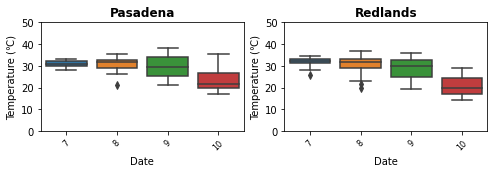

In [12]:
import seaborn as sns

fig, ax=plt.subplots(1,2, figsize=(8,2))

sns.boxplot(x='Month', y='Value', data=df_temp_pasadena, ax=ax[0])
sns.boxplot(x='Month', y='Value', data=df_temp_redlands, ax=ax[1])

for i in range(2):
    ax[i].set_xlabel('Date')
    ax[i].set_ylim(0, 50)
    ax[i].set_ylabel('Temperature (℃)')
    ax[i].tick_params(axis='x', labelrotation=45, labelsize=8)
ax[0].set_title('Pasadena', fontweight='bold')
ax[1].set_title('Redlands', fontweight='bold')
fig.show()

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_13480/1114626324.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


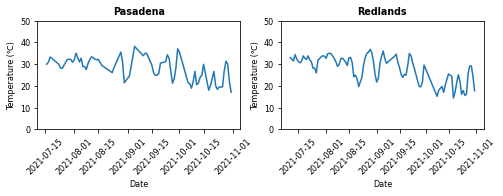

In [92]:
fig, ax=plt.subplots(1,2, figsize=(8,2))

ax[1].plot(df_temp_redlands['Date'], df_temp_redlands['Value'], markersize=2)
ax[0].plot(df_temp_pasadena['Date'], df_temp_pasadena['Value'], markersize=2)

for i in range(2):
    ax[i].set_xlabel('Date')
    ax[i].set_ylim(0, 50)
    ax[i].set_ylabel('Temperature (℃)')
    ax[i].tick_params(axis='x', labelrotation=45, labelsize=8)
ax[1].set_title('Redlands', fontweight='bold')
ax[0].set_title('Pasadena', fontweight='bold')
fig.show()
#fig.savefig('../../result/time_series_temp_morning_daily_redlands_pasadena.png', 
#            dpi=1200, bbox_inches='tight')

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_13480/2587760674.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


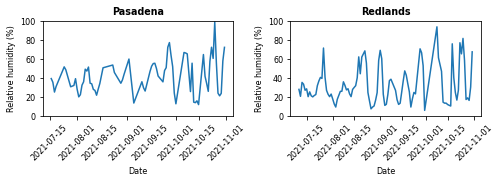

In [93]:
fig, ax=plt.subplots(1,2, figsize=(7,3))

ax[1].plot(df_RH_redlands['Date'], df_RH_redlands['Value'], markersize=2)
ax[0].plot(df_RH_pasadena['Date'], df_RH_pasadena['Value'], markersize=2)

for i in range(2):
    ax[i].set_xlabel('Date')
    ax[i].set_ylim(0, 100)
    ax[i].set_ylabel('Relative humidity (%)')
    ax[i].tick_params(axis='x', labelrotation=45, labelsize=8)
    ax[i].set_box_aspect(1/2)
ax[1].set_title('Redlands', fontweight='bold')
ax[0].set_title('Pasadena', fontweight='bold')

plt.tight_layout()
fig.show()
fig.savefig('../../result/time_series_RH_morning_daily_redlands_pasadena.png', 
            dpi=1200, bbox_inches='tight')

## Get Max temperature

In [20]:
# Redlands
filepath = '../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_RL.csv'
df_temp = get_hourly_aqmd(filepath)
df_temp_redlands = df_temp

# Pasadena
filepath = '../../data/raw/AQMD/TEMP_PICKDATA_2021-12-31_PA.csv'
df_temp = get_hourly_aqmd(filepath)
df_temp_pasadena = df_temp

df_temp_redlands = df_temp_redlands[df_temp_redlands['Date'].isin(measure_date_redlands)]
df_temp_pasadena = df_temp_pasadena[df_temp_pasadena['Date'].isin(measure_date_pasadena)]

In [23]:
df_maxtemp_pasadena = df_temp_pasadena.groupby('Date').max().reset_index()
df_maxtemp_redlands = df_temp_redlands.groupby('Date').max().reset_index()

df_maxtemp_pasadena['Month'] = df_maxtemp_pasadena['Date'].apply(lambda x: x.month)
df_maxtemp_redlands['Month'] = df_maxtemp_redlands['Date'].apply(lambda x: x.month)

In [26]:
df_maxtemp_pasadena['Value'] = df_maxtemp_pasadena['Value'].apply(convert_F_to_C)
df_maxtemp_redlands['Value'] = df_maxtemp_redlands['Value'].apply(convert_F_to_C)

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_22624/3395173666.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


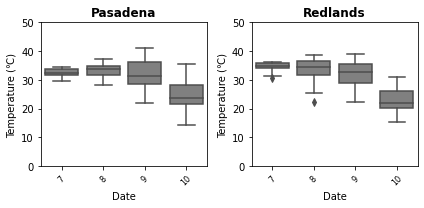

In [31]:
fig, ax=plt.subplots(1,2, figsize=(6,3))

sns.boxplot(x='Month', y='Value', data=df_maxtemp_pasadena, color='grey', ax=ax[0])
sns.boxplot(x='Month', y='Value', data=df_maxtemp_redlands, color='grey', ax=ax[1])

for i in range(2):
    ax[i].set_xlabel('Date')
    ax[i].set_ylim(0, 50)
    ax[i].set_ylabel('Temperature (℃)')
    ax[i].tick_params(axis='x', labelrotation=45, labelsize=8)
ax[1].set_title('Redlands', fontweight='bold')
ax[0].set_title('Pasadena', fontweight='bold')

plt.tight_layout()
fig.show()

## NOx, NOy, O3 from chamber monitors

#### 1. Redlands

In [63]:
# get list of measurement day
test_day = list_of_measurement_day('Redlands', test_type='test')

In [64]:
# create df to store daily averaged data
df_daily_avg = pd.DataFrame(columns=['Date','NO_x', 'NO2','NOx','NO_y','NOy','O3','Temp',
                                     'Pressure','Flow rate'])
df_daily_avg['Date'] = test_day

for i in range(len(test_day)):
    date = test_day[i]
    print('Processing date: ', date)
    df_oneday = get_combined_initial_data(date, 'Redlands')

    # get daily averaged data 
    parameter = ['NO_x', 'NO2','NOx','NO_y','NOy','O3','Temp','Pressure','Flow rate']
    for para in parameter:
        df_daily_avg.loc[i,para] = stats.trim_mean(df_oneday.loc[df_oneday[para]>0, 
                                                                 para], 0.15)

# correct NOx by NOy, and use minmum number as NOx, then calculate NO2.
df_daily_avg['NOx_NOy_cor'] = df_daily_avg['NOy']*0.74-0.18
df_daily_avg['NOx'] = df_daily_avg.apply(lambda x: np.minimum(x['NOx'], 
                                                              x['NOx_NOy_cor']), axis=1)
df_daily_avg['NO2'] = df_daily_avg['NOy']-df_daily_avg['NOx']
df_daily_avg = df_daily_avg[['Date','NO_x', 'NO2','NOx','NO_y','NOy','O3']]  


# save data
df_daily_avg_redlands = df_daily_avg
df_daily_avg_redlands.to_csv('../../data/final/daily_avg_initial_conc_redlands.csv', index=False)

Processing date:  2021-07-10
Processing date:  2021-07-11
Processing date:  2021-07-12
Processing date:  2021-07-13
Processing date:  2021-07-14
Processing date:  2021-07-15
Processing date:  2021-07-16
Processing date:  2021-07-17
Processing date:  2021-07-18
Processing date:  2021-07-19
Processing date:  2021-07-20
Processing date:  2021-07-21
Processing date:  2021-07-22
Processing date:  2021-07-23
Processing date:  2021-07-24
Processing date:  2021-07-25
Processing date:  2021-07-26
Processing date:  2021-07-27
Processing date:  2021-07-28
Processing date:  2021-07-29
Processing date:  2021-07-30
Processing date:  2021-07-31
Processing date:  2021-08-01
Processing date:  2021-08-02
Processing date:  2021-08-03
Processing date:  2021-08-04
Processing date:  2021-08-06
Processing date:  2021-08-07
Processing date:  2021-08-08
Processing date:  2021-08-09
Processing date:  2021-08-10
Processing date:  2021-08-11
Processing date:  2021-08-12
Processing date:  2021-08-13
Processing dat

c:\Users\Shenglun\OneDrive - University of California, Davis\Documents\LA_2021_summer\Repository\LA_2021_summer\code\script\../../code/src\extract_chamber_data.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOx['NO2'] = df_NOx['NOx'] - df_NOx['NO']


Processing date:  2021-10-26
No NOx file!
Processing date:  2021-10-27
No NOx file!
Processing date:  2021-10-28
No NOx file!
Processing date:  2021-10-29
Processing date:  2021-10-30
Processing date:  2021-10-31


#### 2. Pasadena

In [78]:
test_day_pasadena = list_of_measurement_day('Pasadena', test_type='test')

# create df to store daily averaged data
df_daily_avg_pasadena = pd.DataFrame(columns=['Date','NO_x', 'NO2','NOx',
                                              'NO_y','NOy','O3','Temp',
                                              'Pressure','Flow rate'])
df_daily_avg_pasadena['Date'] = test_day_pasadena

for i in range(len(test_day_pasadena)):
    date = test_day_pasadena[i]
    print('Processing date: ', date)
    df_oneday = get_combined_initial_data(date, 'Pasadena')

    # get daily averaged data 
    parameter = ['NO_x', 'NO2','NOx','NO_y','NOy','O3','Temp','Pressure','Flow rate']
    for para in parameter:
        df_daily_avg_pasadena.loc[i,para] = \
            stats.trim_mean(df_oneday.loc[df_oneday[para]>0, para], 0.15)

# save df
df_daily_avg_pasadena = df_daily_avg_pasadena[['Date','NO_x', 'NO2','NOx',
                                               'NO_y','NOy','O3']]  
df_daily_avg_pasadena.to_csv('../../data/final/daily_avg_initial_conc_pasadena.csv', index=False)

Processing date:  2021-07-16
Processing date:  2021-07-17
Processing date:  2021-07-18
Processing date:  2021-07-19
Processing date:  2021-07-23
Processing date:  2021-07-24
Processing date:  2021-07-25
Processing date:  2021-07-28
Processing date:  2021-07-30
Processing date:  2021-07-31
Processing date:  2021-08-01
Processing date:  2021-08-02
Processing date:  2021-08-03
Processing date:  2021-08-04
Processing date:  2021-08-05
Processing date:  2021-08-06
Processing date:  2021-08-07
Processing date:  2021-08-08
Processing date:  2021-08-09
Processing date:  2021-08-10
Processing date:  2021-08-11
Processing date:  2021-08-12
Processing date:  2021-08-13
Processing date:  2021-08-14
Processing date:  2021-08-15
Processing date:  2021-08-17
Processing date:  2021-08-23
Processing date:  2021-08-24
Processing date:  2021-08-28
Processing date:  2021-08-29
Processing date:  2021-08-30
Processing date:  2021-09-02
Processing date:  2021-09-05
Processing date:  2021-09-10
Processing dat

c:\Users\Shenglun\OneDrive - University of California, Davis\Documents\LA_2021_summer\Repository\LA_2021_summer\code\script\../../code/src\extract_chamber_data.py:214: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NOx['NO2'] = df_NOx['NOx'] - df_NOx['NO']


Processing date:  2021-10-05
No NOx file!
Processing date:  2021-10-06
No NOx file!
Processing date:  2021-10-07
No NOx file!
Processing date:  2021-10-08
No NOx file!
Processing date:  2021-10-09
No NOx file!
Processing date:  2021-10-10
No NOx file!
Processing date:  2021-10-11
No NOx file!
Processing date:  2021-10-12
No NOx file!
Processing date:  2021-10-13
No NOx file!
Processing date:  2021-10-14
No NOx file!
Processing date:  2021-10-15
No NOx file!
Processing date:  2021-10-18
No NOx file!
Processing date:  2021-10-19
No NOx file!
Processing date:  2021-10-20
No NOx file!
Processing date:  2021-10-21
No NOx file!
Processing date:  2021-10-22
No NOx file!
Processing date:  2021-10-23
No NOx file!
Processing date:  2021-10-24
No NOx file!
Processing date:  2021-10-25
No NOx file!
Processing date:  2021-10-26
No NOx file!
Processing date:  2021-10-27
No NOx file!
Processing date:  2021-10-28
No NOx file!
Processing date:  2021-10-29
No NOx file!
Processing date:  2021-10-30
No NO

## NOx, O3 in AQMD

#### MDA8 O3

In [3]:
# MDA Ozone data in SoCal       
MDA8_redlands=get_MDA8_O3('../../data/raw/AQMD/OZONE_MDA8_2021-12-31_RL.txt')    
MDA8_pasadena=get_MDA8_O3('../../data/raw/AQMD/OZONE_MDA8_2021-12-31_PA.txt')    

MDA8_redlands['Month'] = MDA8_redlands['Date'].dt.month
MDA8_pasadena['Month'] = MDA8_pasadena['Date'].dt.month

MDA8_redlands.loc[MDA8_redlands['Date'].dt.weekday < 5, 'Week'] = 'Weekday'
MDA8_redlands.loc[MDA8_redlands['Date'].dt.weekday >= 5, 'Week'] = 'Weekend'
MDA8_pasadena.loc[MDA8_pasadena['Date'].dt.weekday < 5, 'Week'] = 'Weekday'
MDA8_pasadena.loc[MDA8_pasadena['Date'].dt.weekday >= 5, 'Week'] = 'Weekend'

MDA8_redlands.to_csv('../../data/final/MDA8_O3_redlands.csv', index=False)
MDA8_pasadena.to_csv('../../data/final/MDA8_O3_pasadena.csv', index=False)

In [20]:
test_day_pasadena = list_of_measurement_day('Pasadena', test_type='test')
filepath = '../../data/raw/AQMD/NOX_PICKDATA_2021-12-31_PA.csv'
df_NOx = get_morning_daily_avg_aqmd(filepath)
df_NOx = df_NOx[df_NOx['Date'].isin(test_day_pasadena)]
df_NOx['Week_num'] = df_NOx['Date'].dt.week
df_NOx.loc[df_NOx['Date'].dt.weekday < 5, 'Week'] = 'Weekday'
df_NOx.loc[df_NOx['Date'].dt.weekday >= 5, 'Week'] = 'Weekend'
df_NOx['Month'] = df_NOx['Date'].dt.month
df_NOx['Value'] = df_NOx['Value']*1e3

C:\Users\Shenglun\AppData\Local\Temp/ipykernel_21832/2062678478.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_NOx['Week_num'] = df_NOx['Date'].dt.week


In [35]:
df_ambient_pasadena = pd.read_csv('../../data/final/daily_avg_initial_conc_pasadena.csv')
df_ambient_pasadena['Date'] = pd.to_datetime(df_ambient_pasadena['Date'],format='%Y-%m-%d')
df_ambient_pasadena.loc[df_ambient_pasadena['Date'].dt.weekday < 5, 'Week'] = 'weekday'
df_ambient_pasadena.loc[df_ambient_pasadena['Date'].dt.weekday >= 5, 'Week'] = 'weekend'
df_ambient_pasadena['Month'] = df_ambient_pasadena['Date'].dt.month

In [36]:
df_NOx_combine = df_ambient_pasadena.merge(df_NOx[['Date','Value']], on='Date')

In [37]:
# set Date as index
df_NOx_combine = df_NOx_combine.set_index('Date')
df_NOx_combine = df_NOx_combine.resample('1D').mean()

(array([18823., 18840., 18854., 18871., 18885., 18901., 18915., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

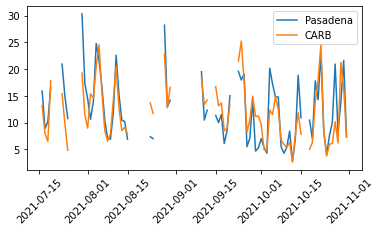

In [40]:
fig, ax=plt.subplots(1,1, figsize=(6,3))

ax.plot(df_NOx_combine.index, df_NOx_combine['NOx'], label='Pasadena')
ax.plot(df_NOx_combine.index, df_NOx_combine['Value'], label='CARB')

plt.legend()
plt.xticks(rotation=45)

(0.0, 35.0)

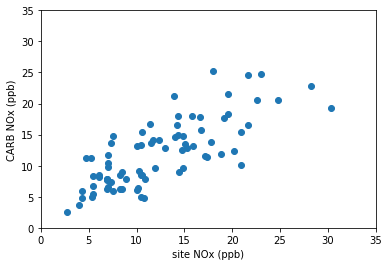

In [29]:
plt.scatter(df_NOx_combine['NOx'], df_NOx_combine['Value'])
plt.xlabel('site NOx (ppb)')
plt.ylabel('CARB NOx (ppb)')
plt.ylim(0, 35)
plt.xlim(0, 35)

MDA8_RL

## CO from AQMD

In [113]:
filepath = '../../data/raw/AQMD/CO_PICKDATA_2021-12-31_RL.csv'
df_CO_daily_redlands = get_morning_daily_avg_aqmd(filepath)
df_CO_daily_redlands.to_csv('../../data/final/CO_morning_daily_redlands.csv', index=False)